Each maze is an array of arrays, where each value is either a 0 (a path) or 1 (a wall). The goal is to plot the shortest path through the maze.

We start by importing the packages we'll be using and run MazeGen.gen_maze2() to get an idea of what the mazes we'll be solving look like. Note that there are two functions that generate a maze in MazeGen: gen_maze(), which generates a maze with one solution, and gen_maze2(), which generates a maze that has multiple paths through the maze. We'll be using gen_maze2() and finding the shortest route through the maze since that adds a layer of difficulty.

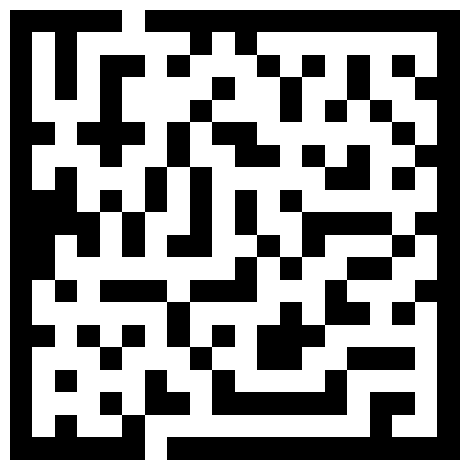

In [21]:
import matplotlib.pyplot as plt
import MazeGen #credit to Jed Rembold who created the script that generates random mazes!

size = 20
maze, enter, exitt = MazeGen.gen_maze2(size)
plt.imshow(maze,'gray_r')
plt.axis("off")
plt.tight_layout()
plt.show()

Next, we define several functions that we'll use in the main BFS algorithm. There are a few points to make here:
- The function getPath() returns a list of the coordinates that make up the shortest path through the maze. This is done by creating a dictionary where each key:value pair is a coordinate (key) and its parent coordinate (value). Given a starting point, by repeatedly finding its value and plugging it back into the dictionary as a key, we can obtain a list of coordinates which make up the shortest path.
- setAdjacentBFS returns a string:tuple dictionary where each key is a cardinal direction and each tuple is a coordinate. Plainly, it holds the adjacent coordinates of a position.
- enqueValidCoords() adds valid movements (open spaces that haven't already been visited) to a queue.

In [22]:
def contains(structure, item):
    """Given a dict/set and an item, returns True if the item is contained in the dict/set. Returns false otherwise.
       (If I were to re-write this function with my knowledge of CS now, I... wouldn't. I'd remove it completely. Code is
       kept the same for posterity."""
    #if type is dict or set, lookup efficiency is O(1)
    if item in structure:
        return True
    return False

def getPath(parentDict, enter, exitt):
    """Returns a list of coordinates that define the shorest path from the exit to the start. Note that parentDict must be in an extremely specific
       form for this to work. Variable 'enter' is a key attached to a value which is another key. This function emulates a linkedlist without
       implementing a more robust class.
    """
    coords = [exitt]
    curr = exitt
    while contains(parentDict,parentDict[curr]) is True:
        coords.append(parentDict[curr])
        curr = parentDict[curr]
    coords.append((1,enter[1]))
    coords.append((0,enter[1]))
    return coords

def initBFS():
    """Initializes values for the BFS. We create a dict 'adj' where adjacent values and coordinates are stored.
    """
    dictVals = 'upVal upCoords downVal downCoords leftVal leftCoords rightVal rightCoords'
    dictVals = dictVals.split(' ')
    adj = {i:None for i in dictVals}
    return adj

def setAdjacentBFS(adj,curr,maze):
    """Given a coordinate, returns a variable that holds all adjacent values and coordinates.
    """
    y,x = curr
    adj['upVal'],adj['upCoords'] = maze[y-1,x],(y-1,x)
    adj['downVal'],adj['downCoords'] = maze[y+1,x],(y+1,x)
    adj['leftVal'],adj['leftCoords'] = maze[y,x-1],(y,x-1)
    adj['rightVal'],adj['rightCoords'] = maze[y,x+1],(y,x+1)
    return adj

def enqueueValidCoords(queue,adj,visitedSet,parentDict,curr):
    """Appends valid next moves (non-walls) to a queue.
    """
    if (adj['upVal'] == 0) and (not contains(visitedSet,adj['upCoords'])):
        queue.append(adj['upCoords'])
        parentDict[adj['upCoords']] = curr
    if (adj['rightVal'] == 0) and (not contains(visitedSet,adj['rightCoords'])):
        queue.append(adj['rightCoords'])
        parentDict[adj['rightCoords']] = curr
    if (adj['downVal'] == 0) and (not contains(visitedSet,adj['downCoords'])):
        queue.append(adj['downCoords'])
        parentDict[adj['downCoords']] = curr
    if (adj['leftVal'] == 0) and (not contains(visitedSet,adj['leftCoords'])):
        queue.append(adj['leftCoords'])
        parentDict[adj['leftCoords']] = curr
    return queue,parentDict

Lastly, we run the BFS search and plot its results. This algorithm works by exploring each valid space adjacent to the current space. These valid spaces are explored at the same time (hence breadth-first instead of depth-first). When the exit space is reached, we use the previously described method to follow the linkedlist back to the start. We then plot the path on top of the maze using matplotlib.

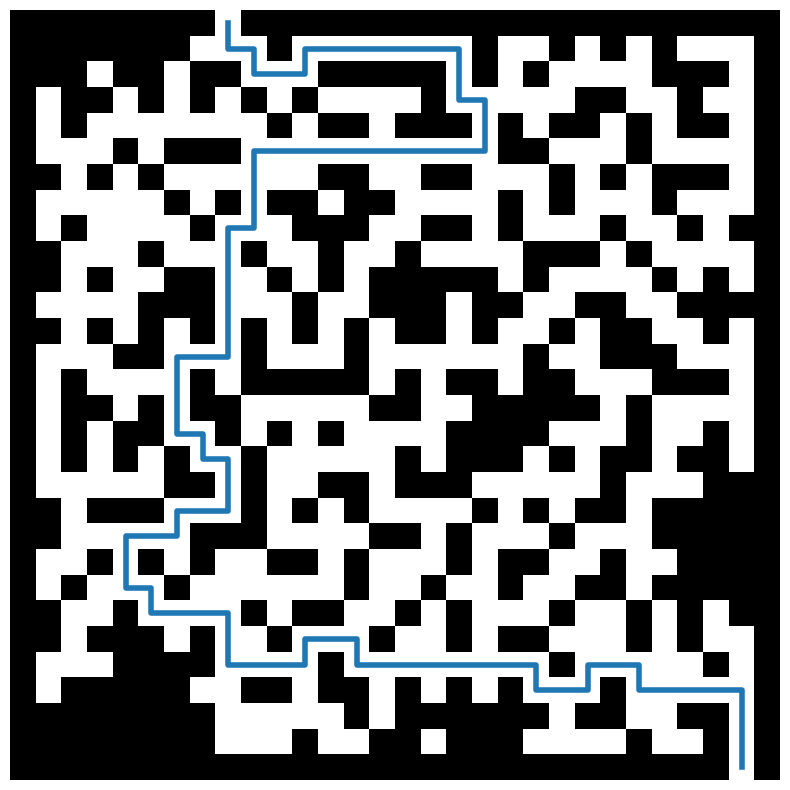

In [23]:
def BFS(maze,enter,exitt):
    """Performs the BFS search.
    """
    visitedSet = {enter}
    enter = (1,enter[1])
    queue = [enter]
    curr = None
    parentDict = {}
    parentCoords = None
    adj = initBFS()
    while curr != exitt and len(queue) > 0:
        curr = queue.pop(0)
        visitedSet.add(curr)
        if curr == exitt:
            break
        adj = setAdjacentBFS(adj,curr,maze)
        queue,parentDict = enqueueValidCoords(queue,adj,visitedSet,parentDict,curr)
        
    #path has been found
    coords = getPath(parentDict, enter, exitt)
    xs = [p[0] for p in coords]
    ys = [p[1] for p in coords]
    plt.imshow(maze,'gray_r')
    plt.plot(ys,xs,linewidth=4)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

size = 30
maze, enter, exitt = MazeGen.gen_maze2(size)
plt.figure(figsize=(8,8))
BFS(maze, enter, exitt)